<IPython.core.display.Javascript object>


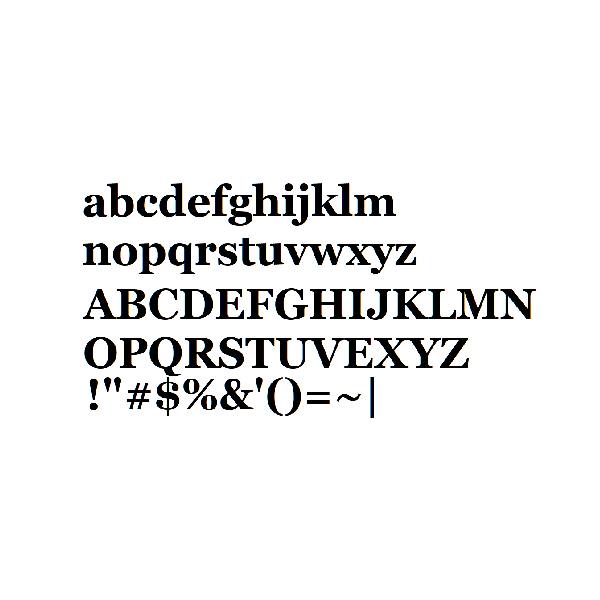

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

FILENAME = './data/test_image.png'
# 画像を読み込む。
img = cv2.imread(FILENAME)
MODE = cv2.RETR_EXTERNAL
#cv2.RETR_TEXTERNAL
#cv2.RETR_TREE  
#cv2.RETR_CCOMP 

#しきい値
TH = 70

# 画像を表示する。
fig, axes = plt.subplots(figsize=(6, 6))
axes.imshow(img)
axes.axis('off')
plt.show()

<IPython.core.display.Javascript object>


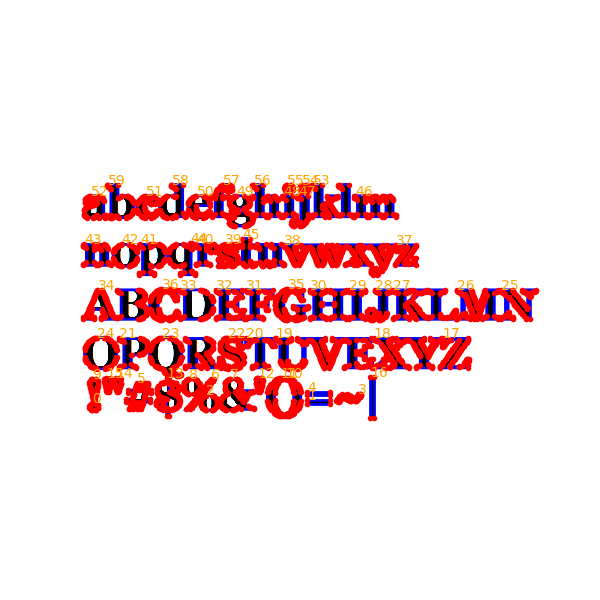

In [9]:
#http://pynote.hatenablog.com/entry/opencv-match-shape より引用
    
# 輪郭を抽出する。
img = cv2.imread(FILENAME)
inv = cv2.bitwise_not(img) #白黒反転
gray = cv2.cvtColor(inv, cv2.COLOR_BGR2GRAY)
 
_, contours, hierarchy = cv2.findContours(gray, MODE, cv2.CHAIN_APPROX_SIMPLE)

def draw_contours(ax, img, contours):
    ax.imshow(img)
    ax.axis('off')
    for i, cnt in enumerate(contours):
        cnt = np.squeeze(cnt, axis=1)  # (NumPoints, 1, 2) -> (NumPoints, 2)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(Polygon(cnt, color='b', fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], 'ro', mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color='orange', size='10')

fig, ax = plt.subplots(figsize=(6, 6))
draw_contours(ax, img, contours)
plt.show()

<IPython.core.display.Javascript object>


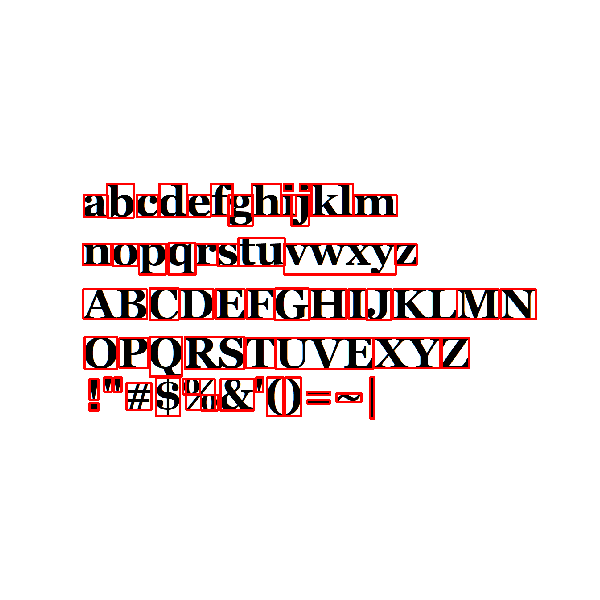

In [10]:
#http://pynote.hatenablog.com/entry/opencv-contour-manipulationより引用
    
%matplotlib notebook
img = cv2.imread(FILENAME)
inv = cv2.bitwise_not(img) #白黒反転
gray = cv2.cvtColor(inv, cv2.COLOR_BGR2GRAY)

labels, contours, hierarchy = cv2.findContours(gray, MODE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(0, len(contours)):
    if len(contours[i]) > 0:

        # remove small objects 小さい領域を削除
        area = cv2.contourArea(contours[i]) 
        if  area < TH:
            #print('- area{0}={1}'.format(i, area))
            continue

        #print('+ area{0}={1}'.format(i, area))
        rect = contours[i]
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 4)

# save
fig, ax = plt.subplots(figsize=(6, 6))
#draw_contours(ax, img, contours)
ax.imshow(img)
ax.axis('off')
plt.show()

contours =60
max=5481.0
min=246.0


<IPython.core.display.Javascript object>


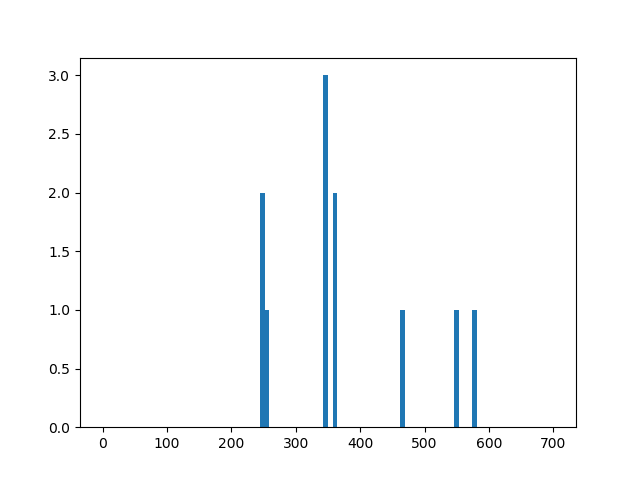

In [11]:
%matplotlib notebook
labels, contours, hierarchy = cv2.findContours(gray, MODE, cv2.CHAIN_APPROX_SIMPLE)

areas =[0] * len(contours)
print('contours ={0}'.format(len(contours)))

for i in range(0, len(contours)):
    if len(contours[i]) > 0:
        area = cv2.contourArea(contours[i]) 
        areas[i] = area

print('max={0}'.format(max(areas)))
print('min={0}'.format(min(areas)))
plt.hist(areas, range=(0, 700), bins=100);

contours =60
areas[0]=246.0
areas[1]=357.0
areas[2]=1027.0
areas[3]=464.0
areas[4]=357.0
areas[5]=1550.5
areas[6]=546.0
areas[7]=2918.5
areas[8]=1027.0
areas[9]=574.0
areas[10]=1203.0
areas[11]=1203.0
areas[12]=347.5
areas[13]=2406.0
areas[14]=348.5
areas[15]=349.0
areas[16]=736.0
areas[17]=1870.5
areas[18]=3787.5
areas[19]=5461.5
areas[20]=1622.5
areas[21]=2430.5
areas[22]=5152.0
areas[23]=4509.0
areas[24]=4124.0
areas[25]=2216.0
areas[26]=3140.0
areas[27]=3958.5
areas[28]=1572.5
areas[29]=1312.0
max=5481.0
min=246.0


<IPython.core.display.Javascript object>


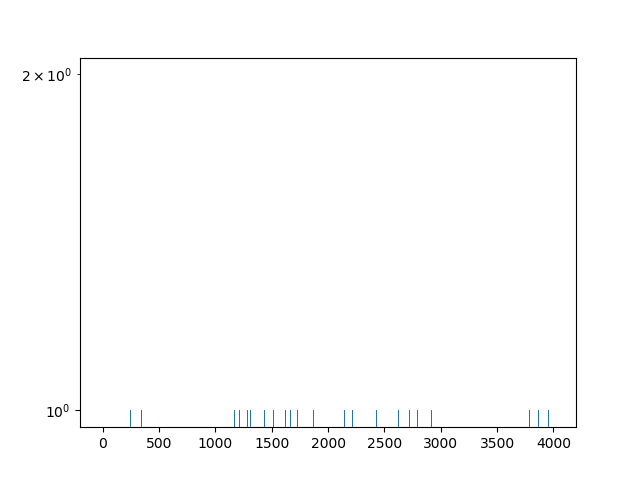

In [12]:
%matplotlib notebook
labels, contours, hierarchy = cv2.findContours(gray, MODE, cv2.CHAIN_APPROX_SIMPLE)

areas =[0] * len(contours)
print('contours ={0}'.format(len(contours)))

for i in range(0, len(contours)):
    if len(contours[i]) > 0:
        area = cv2.contourArea(contours[i]) 
        areas[i] = area

for i in range(0, 30):
    print('areas[{0}]={1}'.format(i, areas[i]))

print('max={0}'.format(max(areas)))
print('min={0}'.format(min(areas)))
plt.hist(areas, range=(0, 4000), bins=1000, log=True);


In [13]:
# anytree がない場合は pip install anytree
from anytree import Node, RenderTree

# 階層構造を元に木を作成する。
root = Node('root')
nodes = {i: Node('contour {}'.format(i)) for i in range(len(hierarchy[0]))}
nodes[-1] = root

for i, info in enumerate(hierarchy[0]):
    nodes[i].parent = nodes[info[3]]
    print('contour {} (next: {}, previous: {}, first_child: {}, parent: {})'.format(i, *info))

# 木を出力する。
for pre, fill, node in RenderTree(root):
    print('{}{}'.format(pre, node.name))

contour 0 (next: 1, previous: -1, first_child: -1, parent: -1)
contour 1 (next: 2, previous: 0, first_child: -1, parent: -1)
contour 2 (next: 3, previous: 1, first_child: -1, parent: -1)
contour 3 (next: 4, previous: 2, first_child: -1, parent: -1)
contour 4 (next: 5, previous: 3, first_child: -1, parent: -1)
contour 5 (next: 6, previous: 4, first_child: -1, parent: -1)
contour 6 (next: 7, previous: 5, first_child: -1, parent: -1)
contour 7 (next: 8, previous: 6, first_child: -1, parent: -1)
contour 8 (next: 9, previous: 7, first_child: -1, parent: -1)
contour 9 (next: 10, previous: 8, first_child: -1, parent: -1)
contour 10 (next: 11, previous: 9, first_child: -1, parent: -1)
contour 11 (next: 12, previous: 10, first_child: -1, parent: -1)
contour 12 (next: 13, previous: 11, first_child: -1, parent: -1)
contour 13 (next: 14, previous: 12, first_child: -1, parent: -1)
contour 14 (next: 15, previous: 13, first_child: -1, parent: -1)
contour 15 (next: 16, previous: 14, first_child: -1, p